<a href="https://colab.research.google.com/github/JeskaOak/dio-redesneurais/blob/main/dio_redesneurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial indicado pelo Prof. Diego Renan



# Importando Bibliotecas


In [ ]:
%matplotlib inline

import os
import zipfile

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image

# Carregando DataSet

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-11-10 00:27:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   100MB/s    in 0.7s    

2022-11-10 00:27:50 (100 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
root = '/tmp/cats_and_dogs_filtered'
exclude = ["PetImages/Cat/666.jpg", "PetImages/Dog/11702.jpg"]
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['/tmp/cats_and_dogs_filtered/validation', '/tmp/cats_and_dogs_filtered/validation/cats', '/tmp/cats_and_dogs_filtered/validation/dogs', '/tmp/cats_and_dogs_filtered/train', '/tmp/cats_and_dogs_filtered/train/cats', '/tmp/cats_and_dogs_filtered/train/dogs']


In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

In [ ]:
random.shuffle(data)

In [ ]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [ ]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[3, 3, 1, 5, 0, 0, 4, 4, 5, 2, 4, 0, 3, 1, 5, 1, 4, 4, 2, 3, 4, 3, 0, 3, 0, 4, 5, 1, 0, 3, 3, 4, 4, 1, 3, 3, 4, 0, 3, 1, 3, 4, 0, 5, 0, 3, 0, 3, 4, 5, 0, 3, 4, 4, 0, 2, 5, 1, 2, 3, 4, 3, 4, 3, 3, 4, 3, 5, 0, 3, 4, 2, 4, 3, 4, 0, 3, 3, 2, 3, 0, 4, 4, 0, 5, 0, 0, 3, 5, 3, 5, 4, 1, 1, 5, 0, 1, 3, 3, 0, 5, 3, 4, 1, 3, 3, 1, 5, 5, 0, 4, 3, 0, 2, 0, 0, 2, 5, 4, 4, 4, 3, 0, 0, 5, 5, 0, 0, 3, 3, 5, 5, 1, 0, 4, 2, 3, 4, 3, 2, 3, 5, 5, 5, 4, 4, 0, 5, 4, 3, 3, 5, 1, 4, 5, 4, 0, 3, 3, 5, 4, 3, 0, 3, 3, 2, 5, 4, 1, 1, 4, 4, 3, 3, 5, 5, 3, 3, 3, 4, 0, 4, 3, 5, 5, 3, 1, 1, 4, 5, 0, 3, 2, 4, 4, 0, 3, 3, 0, 0, 1, 5, 3, 1, 4, 0, 4, 1, 5, 1, 3, 2, 3, 4, 4, 2, 3, 3, 4, 0, 3, 5, 0, 3, 4, 4, 2, 5, 4, 3, 1, 2, 3, 3, 2, 0, 3, 0, 1, 2, 0, 4, 3, 4, 5, 5, 1, 0, 5, 5, 3, 5, 5, 0, 1, 4, 4, 4, 1, 5, 3, 5, 2, 4, 4, 0, 0, 3, 3, 2, 3, 5, 2, 4, 5, 5, 3, 5, 4, 3, 5, 2, 5, 2, 5, 2, 5, 3, 3, 2, 5, 4, 0, 3, 3, 5, 3, 4, 3, 3, 0, 1, 3, 1, 3, 3, 3, 0, 4, 4, 3, 3, 1, 4, 0, 4, 3, 3, 4, 4, 3, 5, 4, 4, 3, 4, 1, 4, 3, 1, 4, 1, 3, 

In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(900, 6)


In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 6000 images from 6 categories
train / validation / test split: 4200, 900, 900
training data shape:  (4200, 224, 224, 3)
training labels shape:  (4200, 6)


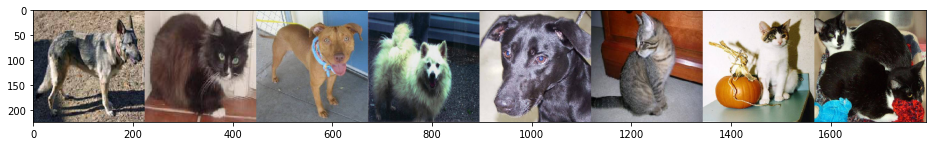

In [ ]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

# Construindo network neural


In [ ]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                   

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=25,
                    epochs=2,
                    validation_data=(x_val, y_val))

Epoch 1/2
168/168 [==============================] - 280s 2s/step - loss: 1.6792 - accuracy: 0.3412 - val_loss: 1.6826 - val_accuracy: 0.3200
Epoch 2/2
168/168 [==============================] - 314s 2s/step - loss: 1.6609 - accuracy: 0.3410 - val_loss: 1.6702 - val_accuracy: 0.3200


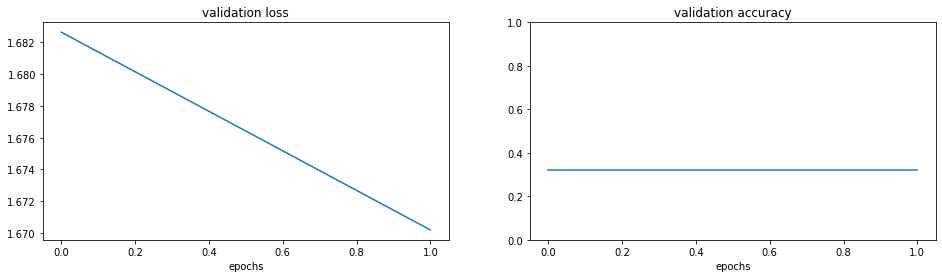

In [17]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.678560733795166
Test accuracy: 0.3100000023841858


# Transfer learning com  network existente

In [19]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 14s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [20]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [21]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=25, 
                         epochs=2, 
                         validation_data=(x_val, y_val))

Epoch 1/2
168/168 [==============================] - 2682s 16s/step - loss: 1.7438 - accuracy: 0.2831 - val_loss: 1.6583 - val_accuracy: 0.3178
Epoch 2/2
168/168 [==============================] - 2608s 16s/step - loss: 1.6541 - accuracy: 0.2974 - val_loss: 1.6411 - val_accuracy: 0.3256


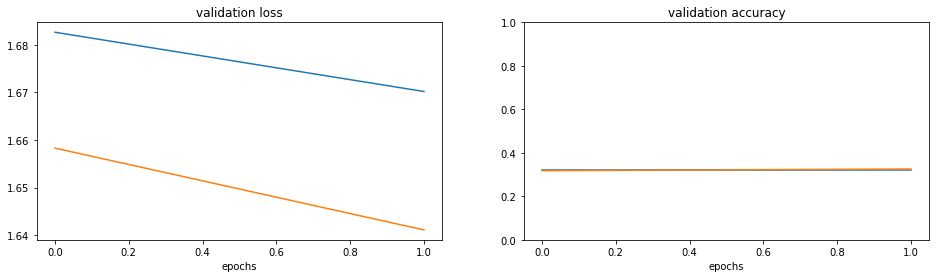

In [23]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [24]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.6785188913345337
Test accuracy: 0.324444442987442
